In [1]:
from utils import *
from utils_sovo_old import *

vol_file = '../Analysis/depreciated/analysis_sections_sovo.csv'
dat_xls_file = pd.read_csv(vol_file)
dat_xls_file['folder'] = dat_xls_file['folder'].apply(lambda x: f'{x:0>8}')
dat_xls_file = dat_xls_file.reset_index()

t_pre = 100 # time window pre-swim
t_post = 350 # time window post-swim
t_label = np.arange(-t_pre, t_post)/300
c_list = ['k', 'r', 'b']
labels = ['CL', 'Swim-only', 'Visual-only']
# swim_power_thres = 10
t_swim_CL = t_pre + 100
t_swim_OL = t_pre + 200

for ind, row in dat_xls_file.iterrows():
    folder = row['folder']
    fish = row['fish']
    task_type = row['task']

    if not os.path.exists(f'../Analysis/swim_voltr/{folder}_{fish}_swim_voltr_dat.npz'):
        continue

    _ = np.load(f'../Analysis/swim_power/{folder}_{fish}_swim_dat.npz')
    r_swim = _['r_swim']
    l_swim = _['l_swim']
    task_period = _['swim_task_index'].astype('int')
    visu = _['visu']
    p_swim = np.sqrt(r_swim**2 + l_swim**2)

    task_period = _['swim_task_index'].astype('int')            
    _ = np.load(f'../Analysis/swim_voltr/{folder}_{fish}_swim_voltr_dat.npz')
    trial_valid = _['trial_valid']
    swim_power_thres = np.percentile(p_swim[(task_period==1) & trial_valid].mean(axis=0), 99)

    trial_pre = (p_swim[:, :t_pre]>0).sum(axis=-1)==0
    trial_valid_CL = (p_swim[:, t_swim_CL:t_swim_CL+150]>0).sum(axis=-1)==0
    trial_valid_CL = trial_valid_CL & trial_pre
    trial_valid_OL = ((visu.max(axis=-1, keepdims=True)-visu)[:, :-50]>0).sum(axis=-1)==0
    trial_valid_OL = trial_valid_OL & (p_swim[:, t_swim_CL:t_pre+300].max(axis=-1)<swim_power_thres)
    trial_valid_OL = trial_valid_OL & trial_pre
    # trial_valid_OL = trial_valid_OL & ((p_swim[:, t_swim_OL:t_pre+300]>1).sum(axis=-1)==0)
    # trial_valid_OL = trial_valid_OL & ((p_swim[:, t_swim_OL:t_swim_OL+150]>0).sum(axis=-1)==0)
    trial_valid_VL = (p_swim[:, t_pre:t_pre+300]>0).sum(axis=-1)==0
    trial_valid_VL = trial_valid_VL & (visu[:, t_swim_OL:t_pre+300].min(axis=-1)>=0)
    trial_valid_VL = trial_valid_VL & trial_pre
#     if np.percentile(p_swim[(task_period==1) & trial_valid].mean(axis=0), 95)>swim_power_thres:
#         continue

    if np.percentile(p_swim[(task_period==2) & trial_valid].mean(axis=0), 95)>swim_power_thres:
        continue        
#     if np.percentile(p_swim[(task_period==2) & trial_valid, t_swim_CL:t_swim_CL+150].max(axis=-1), 95)>swim_power_thres:
#         continue
    if ((task_period==2) & trial_valid & trial_valid_OL).sum()<5:
        continue
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    ax = ax.flatten()    
    for n in range(3):
        if n==0:
            trial_valid_ = trial_valid & trial_valid_CL
        if n==1:
            trial_valid_ = trial_valid & trial_valid_OL
        if n==2:
            trial_valid_ = trial_valid & trial_valid_VL
        ax[0].plot(t_label, p_swim[(task_period==n+1) & trial_valid_].mean(axis=0), c_list[n])
        ax[1].plot(t_label, visu[(task_period==n+1) & trial_valid_].mean(axis=0), c_list[n])        
    ax[0].set_xlabel('Time (sec)')
    ax[0].set_ylabel('Swim power')
    ax[0].set_xlim([-0.2, 1.0])
    ax[1].set_xlabel('Time (sec)')
    ax[1].set_ylabel('Visual')
    ax[1].set_xlim([-0.2, 1.0])
    sns.despine()
    plt.savefig(f'../Plots/sovo/exp_swim_visual.pdf')
    plt.close('all')
    print([folder, fish])

['05022019', 'Fish2-1-swimonly_visualonly']
['05022019', 'Fish2-2-swimonly_visualonly']
['05022019', 'Fish3-1-swimonly_visualonly']
['05022019', 'Fish3-2-swimonly_visualonly']
['05092019', 'Fish3-1-swimonly_visualonly']
['05092019', 'Fish3-2-swimonly_visualonly']
['05092019', 'Fish6-1-swimonly_visualonly']
['05092019', 'Fish7-1-swimonly_visualonly']
['05092019', 'Fish7-2-swimonly_visualonly']
['05152019', 'Fish3-1-swimonly_visualonly']
['05152019', 'Fish4-1-swimonly_visualonly']
['05162019', 'Fish1-plane#1-before-swimonly_visualonly']
['05162019', 'Fish1-plane#2-before-swimonly_visualonly']
['05162019', 'Fish2-plane#1-before-swimonly_visualonly']
['05162019', 'Fish3-plane#1-before-swimonly_visualonly']
['05232019', 'Fish3-Plane#1-before-swimonly_visualonly']
['05232019', 'Fish5-Plane#1-before-swimonly_visualonly']


number of cells 100
21
['05092019Fish3' '05092019Fish6' '05092019Fish7' '05152019Fish3'
 '05152019Fish4' '05162019Fish1']
(6,)


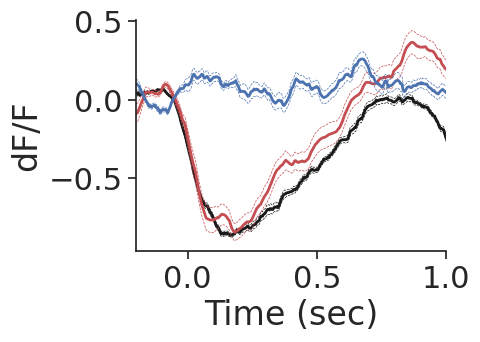

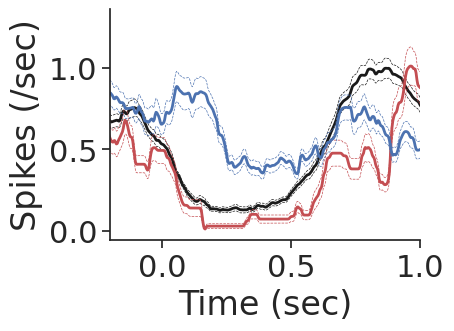

In [2]:
c_list = ['k', 'r', 'b']
labels = ['CL', 'Swim-only', 'Visual-only']
sub_ave = []
spk_ave = []
fish_id = []

for ind, row in dat_xls_file.iterrows():
    folder = row['folder']
    fish = row['fish']
    _ = sovo_act(folder, fish)
    if _ is not None:
        sub_ave.append(_[0])
        spk_ave.append(_[1])
        fish_id.append(_[2])
sub_ave = np.concatenate(sub_ave)
spk_ave = np.concatenate(spk_ave)
fish_id = np.concatenate(fish_id)
print(f'number of cells {sub_ave.shape[0]}')

inh_sub = sub_ave[:, 0, :]
_, p_inh_sub = ttest_1samp(inh_sub, 0, axis=-1)
max_sub = inh_sub.max(axis=-1)
min_sub = inh_sub.min(axis=-1)
min_sub_ind = np.argmin(inh_sub, axis=-1)
valid_cell = (np.abs(min_sub)>1.5*np.abs(max_sub)) & (min_sub<0) & (min_sub_ind<t_pre+100) & (p_inh_sub<0.01)

inh_spk_ = spk_ave[:, 0, :]
valid_spk = inh_spk_[:, t_pre:t_pre+100].mean(axis=-1)<inh_spk_[:, t_pre+150:t_pre+300].mean(axis=-1)
valid_spk_ = inh_spk_.max(axis=-1)>0.5
valid_cell = valid_cell & valid_spk & valid_spk_
print(valid_cell.sum())
print(np.unique(np.array(fish_id)[valid_cell]))
print(np.unique(np.array(fish_id)[valid_cell]).shape)

# valid_cell = np.ones(sub_ave.shape[0]).astype('bool')
c_list = ['k', 'r', 'b']
labels = ['CL', 'Swim-only', 'Visual-only']

plt.figure(figsize=(4, 3))
for n in range(3):
    ave_ = sub_ave[:, n, :]/np.abs(min_sub[:, np.newaxis])
    std_ = sem(ave_[valid_cell], axis=0, nan_policy='omit')/2
    valid_cell_ = ave_[valid_cell].std()
    mean_ = np.mean(ave_[valid_cell], axis=0)
    plt.plot(t_label, mean_, f'-{c_list[n]}', lw=2)
    plt.plot(t_label, mean_-std_, f'--{c_list[n]}', lw=0.5)
    plt.plot(t_label, mean_+std_, f'--{c_list[n]}', lw=0.5)
    plt.xlim([-0.2, 1])
    plt.xlabel('Time (sec)')
    plt.ylabel('dF/F')
    sns.despine()
# plt.savefig('../Plots/sovo/pop_ave_sub.pdf')
plt.show()

plt.figure(figsize=(4, 3))
for n in range(3):
    ave_ = spk_ave[:, n, :]
    mean_ = np.mean(ave_[valid_cell], axis=0)
    std_ = sem(ave_[valid_cell], axis=0, nan_policy='omit')/2
    plt.plot(t_label, mean_, f'-{c_list[n]}', lw=2)
    plt.plot(t_label, mean_-std_, f'--{c_list[n]}', lw=0.5)
    plt.plot(t_label, mean_+std_, f'--{c_list[n]}', lw=0.5)
    plt.xlim([-0.2, 1])
    plt.xlabel('Time (sec)')
    plt.ylabel('Spikes (/sec)')
    sns.despine()
# plt.savefig('../Plots/sovo/pop_ave_spk.pdf')
plt.show()

In [3]:
spk_ave__ = spk_ave[valid_cell, :, 300:350].mean(axis=-1)
spk_ave__ = np.concatenate([spk_ave[valid_cell, :, 10:60].mean(axis=-1).mean(axis=-1, keepdims=True), spk_ave__], axis=1)
spk_ave__[:, 0] = spk_ave__[:, 0]
spk_ave__[:, 1] = spk_ave__[:, 1]+0.12
spk_ave__[:, 3] = spk_ave__[:, 3]-0.15

step_ = 0.5
spk_ave__ = np.concatenate([spk_ave__, spk_ave__+np.random.rand(*spk_ave__.shape)*step_-step_/2, \
                            spk_ave__+np.random.rand(*spk_ave__.shape)*step_-step_/2], axis=0)
spk_ave__[spk_ave__<0] = 0

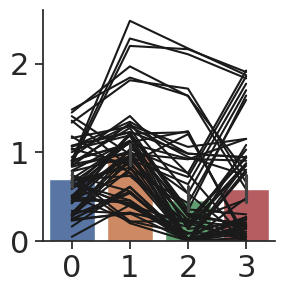

In [4]:
plt.figure(figsize=(3, 3))
# sns.boxplot(spk_ave__)
plt.plot(spk_ave__.T, '-k')
sns.barplot(spk_ave__)
sns.despine()
plt.savefig('fig3h_sup.pdf')

In [5]:
spk_ave__.mean(axis=0)

array([0.69305738, 0.97071496, 0.46475601, 0.58493096])

In [6]:
wilcoxon(spk_ave__[:, 0], spk_ave__[:, 1], alternative='less')

WilcoxonResult(statistic=348.0, pvalue=3.1150121751710927e-06)

In [7]:
wilcoxon(spk_ave__[:, 0], spk_ave__[:, 2], alternative='less')

WilcoxonResult(statistic=1542.0, pvalue=0.9998718191969994)

In [8]:
wilcoxon(spk_ave__[:, 0], spk_ave__[:, 3], alternative='less')

WilcoxonResult(statistic=1245.0, pvalue=0.9476546865153204)

In [9]:
import pandas as pandas
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [12]:
fish_id = np.random.randint(0, 7, size=spk_ave__.shape[0])

In [14]:
dict = {'Data': spk_ave__[:, :2].T.reshape(-1),
        'Fish': np.hstack([fish_id, fish_id]),
        'Gain': np.hstack([np.zeros(spk_ave__.shape[0]), np.ones(spk_ave__.shape[0])])}
df = pd.DataFrame(dict)

In [15]:
model = ols('Data ~ C(Fish) + C(Gain) + C(Fish):C(Gain)', data=df).fit() 
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Fish),3.294134,6.0,3.360624,0.004397
C(Gain),2.428452,1.0,14.864814,0.000193
C(Fish):C(Gain),1.232917,6.0,1.257803,0.282704
Residual,18.297347,112.0,NaN,NaN


In [16]:
from scipy.stats import f

In [27]:
f.sf(1.860624, 6, 102)

0.09480316414840827

In [29]:
f.sf(0.932917, 6, 102)

0.47483433288448995